# Static Visualization

In [1]:
# Check out viz.yml for package installation

# Basic data processing
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn
import plotnine
import ipyvizzu
import panel
import bokeh

C:\Users\malawrim\AppData\Local\Temp\ipykernel_19332\457139912.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load Data

In [2]:
# load anscombe data from seaborn
# Anscombe's quartet are four nearly identical sets of descriptive statistics that have very different distributions
anscombe = seaborn.load_dataset("anscombe")

## MatPlotLib  
[matplotlib tutorial](https://matplotlib.org/stable/tutorials/index.html)  
[matplotlib cheatsheets](https://matplotlib.org/cheatsheets/)  

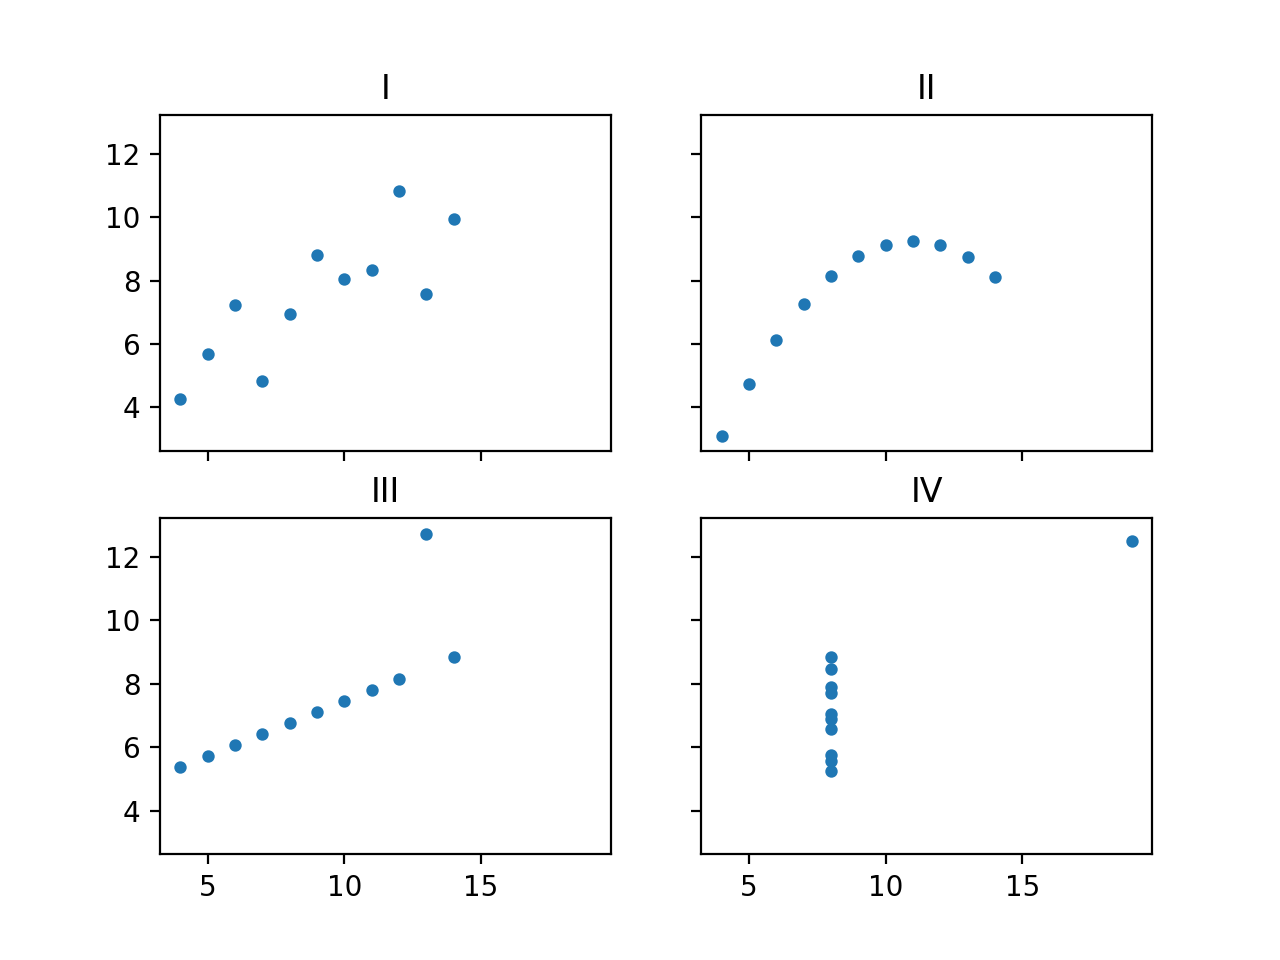

In [76]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for (label,group), ax in zip(anscombe.groupby('dataset'), axes.flat):
  ax.scatter(group['x'], group['y'], s=12)
  ax.set_title(label)

# Save/export figure
plt.savefig("matplotlib_anscombe.svg", dpi=400)  
plt.show()


## Plotnine  

Python's version of ggplot - syntax is essentially identical  
Documentation is poor so utilize ggplot documentation  

[ggplot tutorial](http://r-statistics.co/Complete-Ggplot2-Tutorial-Part1-With-R-Code.html)  
[plotnine examples](https://plotnine.readthedocs.io/en/stable/gallery.html#)

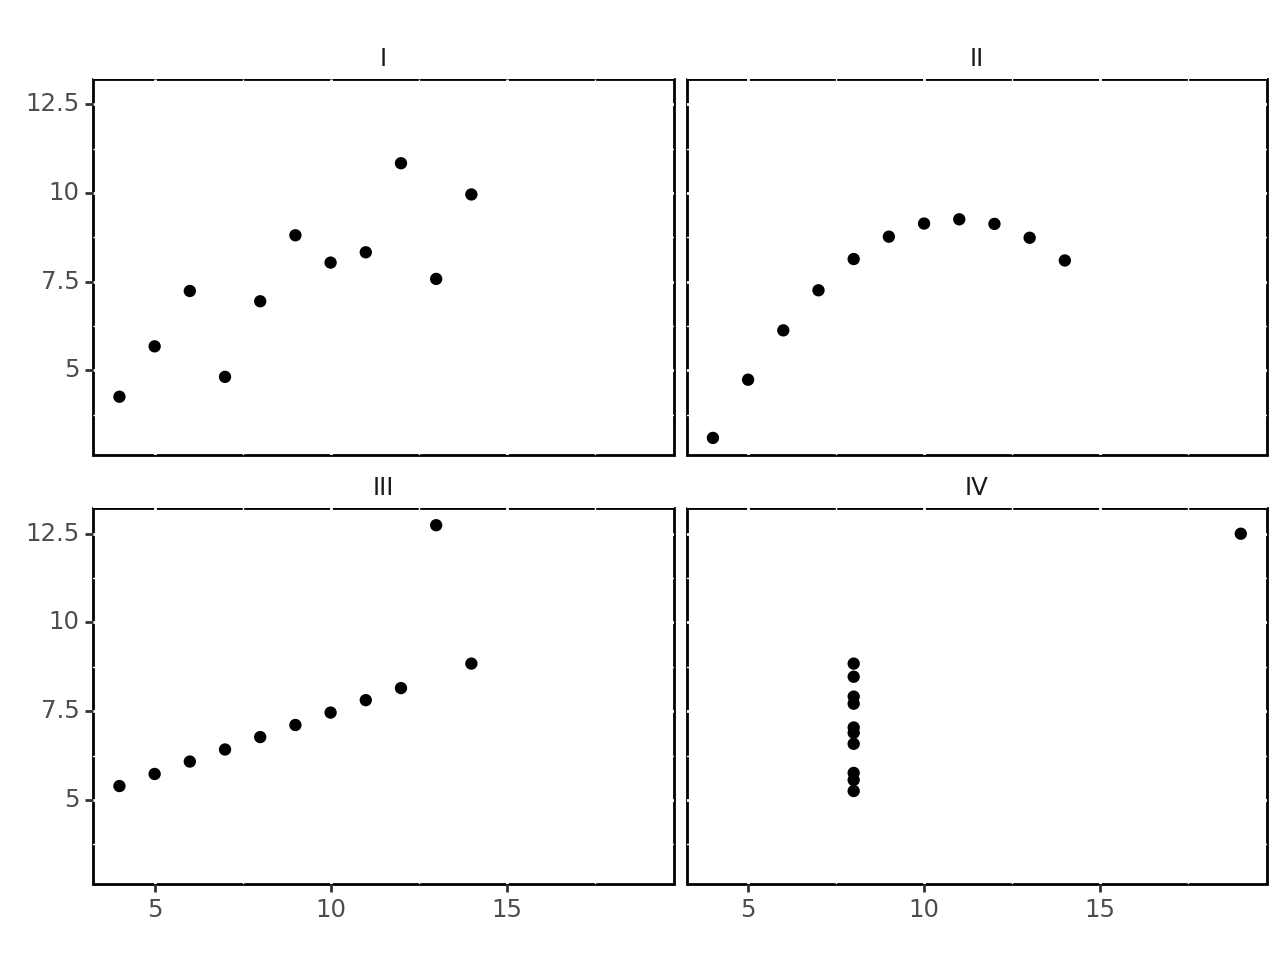

In [54]:
(
    plotnine.ggplot(anscombe, plotnine.aes(x='x', y='y'))
    + plotnine.facet_wrap('dataset', ncol=2)
    + plotnine.geom_point()
    + plotnine.labs(x = "", y="")
    + plotnine.theme(
        panel_background=plotnine.element_rect(fill="white"),
        strip_background=plotnine.element_rect(fill="white"),
        panel_border=plotnine.element_rect(color = "black", size = 1)
        )
).draw()

### Alternatively, utilize any of plotnine's built in themes (plotnine.theme)

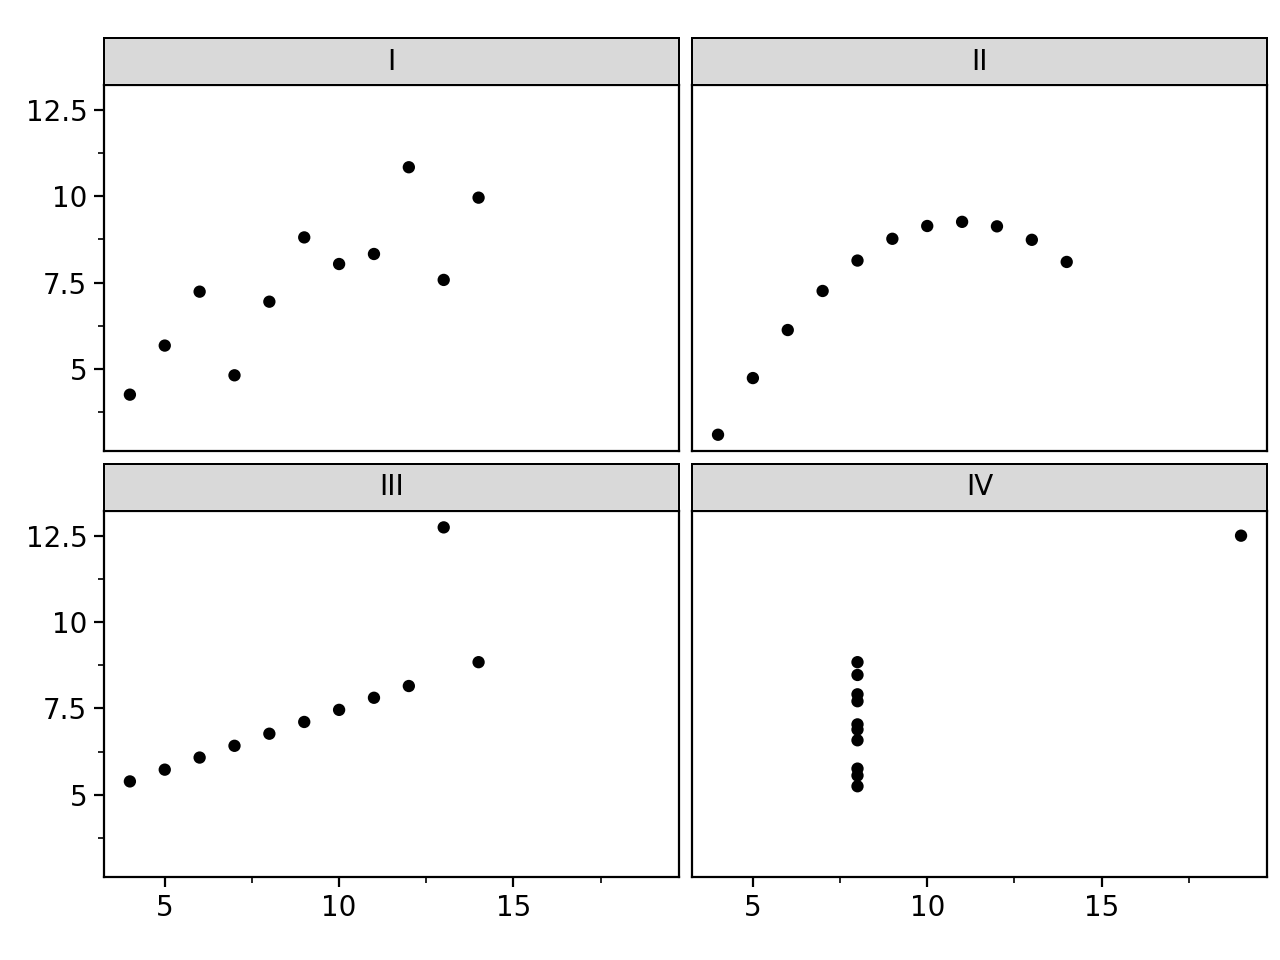

In [56]:
(
    plotnine.ggplot(anscombe, plotnine.aes(x='x', y='y'))
    + plotnine.facet_wrap('dataset', ncol=2)
    + plotnine.geom_point()
    + plotnine.labs(x = "", y="")
    + plotnine.theme_matplotlib()
).draw()

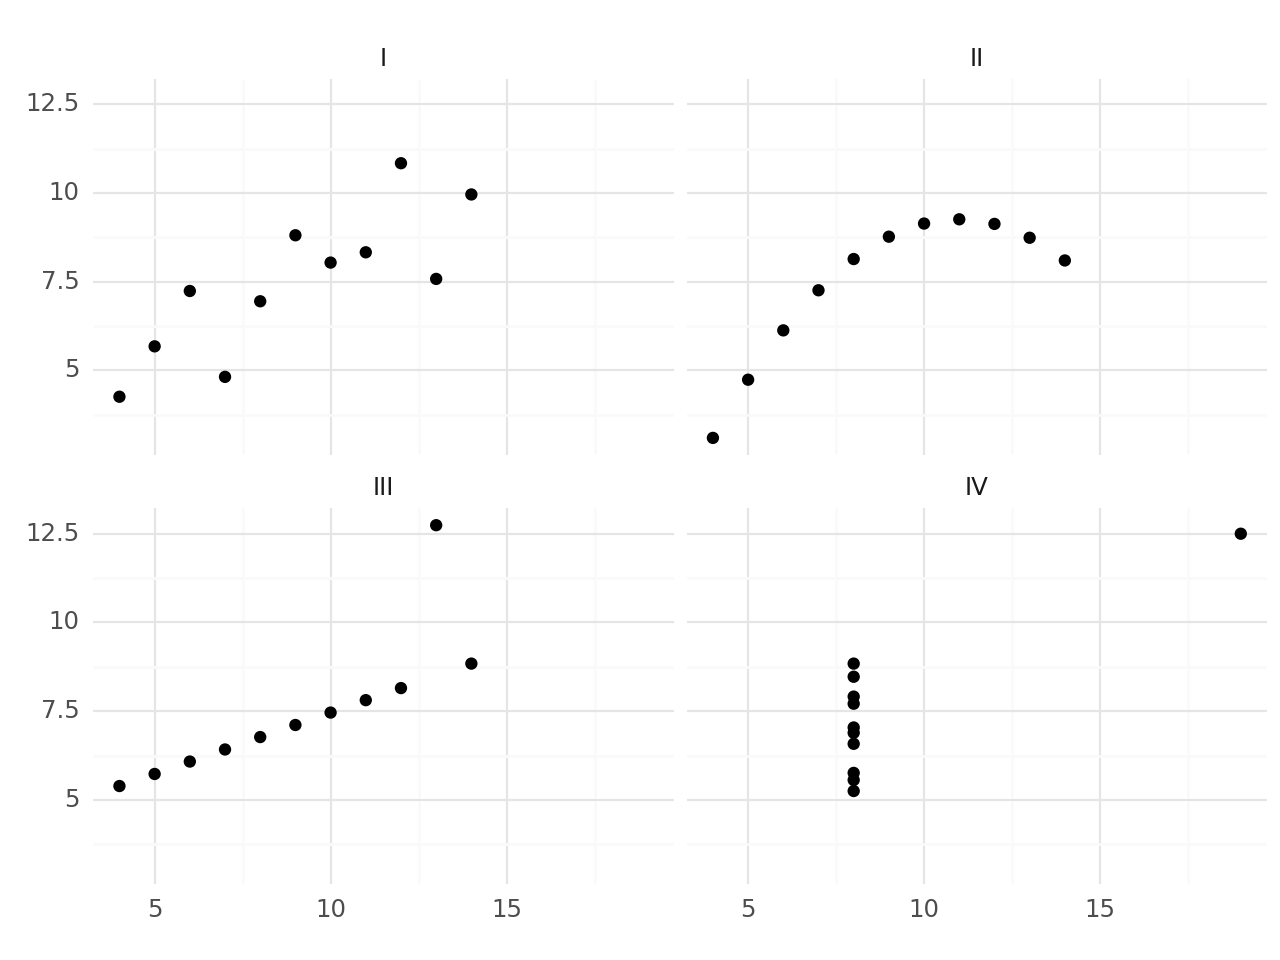

In [55]:
(
    plotnine.ggplot(anscombe, plotnine.aes(x='x', y='y'))
    + plotnine.facet_wrap('dataset', ncol=2)
    + plotnine.geom_point()
    + plotnine.labs(x = "", y="")
    + plotnine.theme_minimal()
).draw()

## Seaborn

[Seaborn user guide and tutorials](https://seaborn.pydata.org/tutorial.html)  
[Seaborn examples](https://seaborn.pydata.org/examples/index.html)  

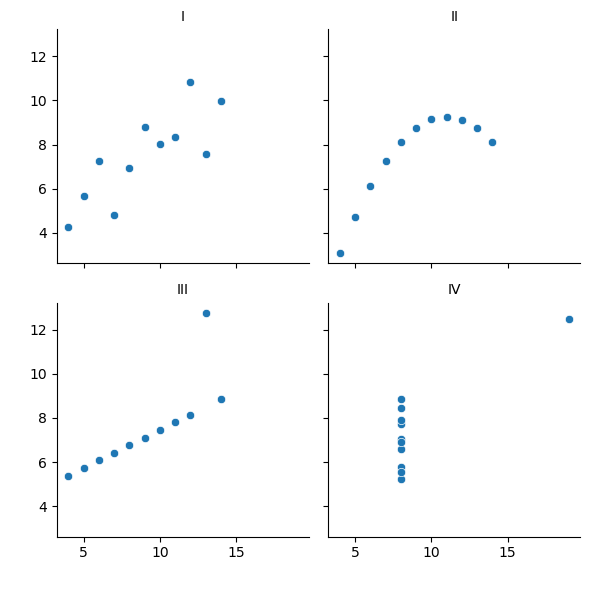

In [5]:
g = seaborn.FacetGrid(anscombe, col="dataset", col_wrap=2)
g.map(seaborn.scatterplot, 'x', 'y')
g.set_axis_labels(x_var=" ", y_var=" ")
g.set_titles("{col_name}")

#### Seaborn has some nice built in functions such as [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) which plots data and regression across a FacetGrid

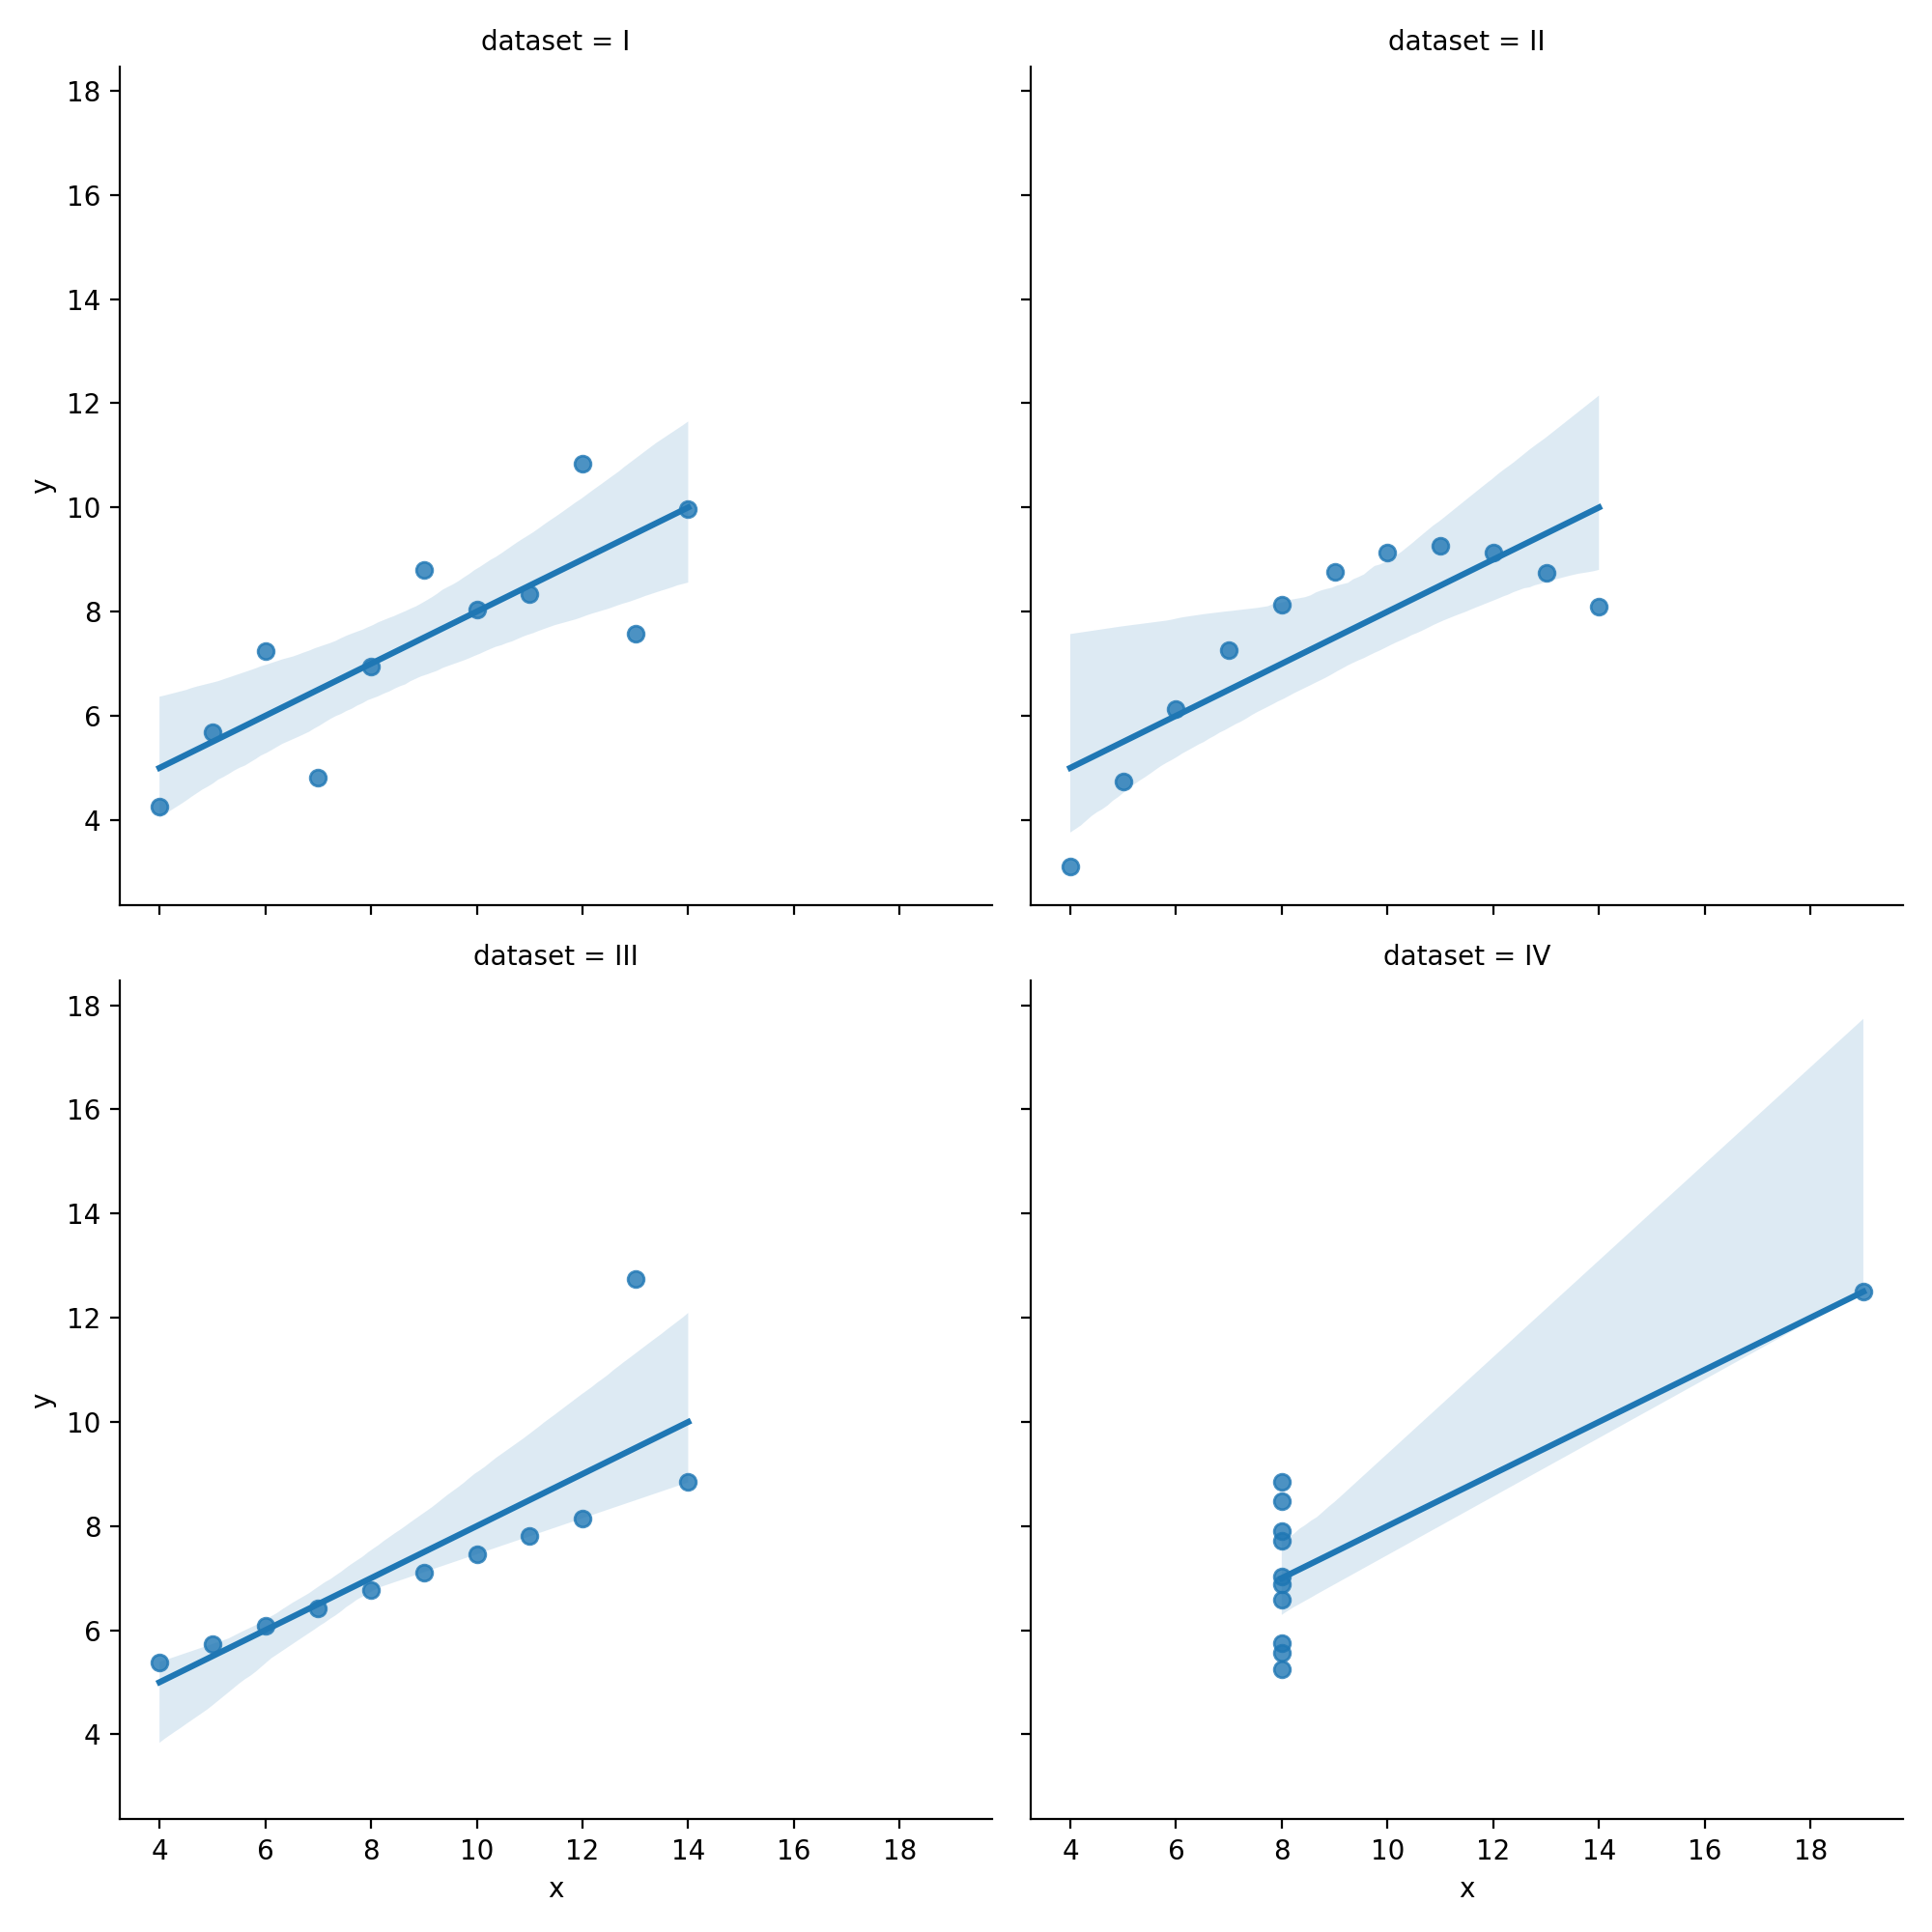

In [60]:
seaborn.lmplot(anscombe, x='x', y='y', col = 'dataset', col_wrap=2)
plt.show()

# Interactive Visualization

A couple of nice Python packages that allow for interactive visualizations through JupyterNotebooks or html

In [5]:
import panel as pn
import jupyter_bokeh

pn.extension()

x = pn.widgets.Select(name='x', options=["x", "y"])
y = pn.widgets.Select(name='y', options=["x", "y"], value='y')
x


BokehModel(combine_events=True, render_bundle={'docs_json': {'1117bbb7-83ba-4458-ad21-452e073bba70': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'f2830ecb-803e-4a69-92d6-7218d2bdcb06': {'version…

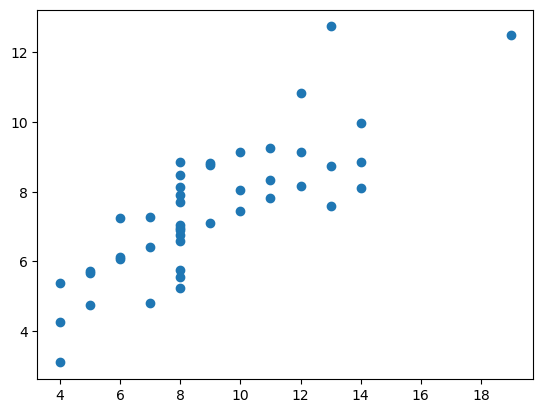

In [19]:
from panel import Column, bind, extension
from panel.widgets import Select

# Increase font size of widgets
css = '''
.bk-root .bk, .bk-root .bk:before, .bk-root .bk:after {
  font-size: 110%;
  }
'''
extension(raw_css=[css])

x = Select(name='x', options=["x", "y"])
y = Select(name='y', options=["x", "y"], value='y')


def update_plot(x, y):
    plt.scatter(anscombe[x], anscombe[y])

Column(
    Column(x, y),
    bind(update_plot, x=x, y=y)
).servable()

In [8]:
pn.extension(design='material', template='material')

x = pn.widgets.Select(name='x', options=["x", "y"])
y = pn.widgets.Select(name='y', options=["x", "y"], value='y')

def update_plot(x, y):
    return (
        12
    )

pn.Row(
    pn.WidgetBox(
        '# Iris K-Means Clustering',
        pn.Column(
            "This app provides an example of **building a simple dashboard using Panel**.\n\nIt demonstrates how to take the output of **k-means clustering on the Iris dataset** using scikit-learn, parameterizing the number of clusters and the variables to plot.\n\nThe entire clustering and plotting pipeline is expressed as a **single reactive function** that responsively returns an updated plot when one of the widgets changes.\n\n The **`x` marks the center** of the cluster.""",
            x, y
        ).servable(target='sidebar')
    ),
    pn.pane.HoloViews(
        pn.bind(update_plot, x, y), sizing_mode='stretch_width'
    ).servable(title='Iris K-Means Clustering')
)

ModuleNotFoundError: No module named 'holoviews'

## Bokeh

[Bokeh tutorial](https://docs.bokeh.org/en/latest/docs/first_steps.html#first-steps) and [examples](https://docs.bokeh.org/en/latest/docs/gallery.html#gallery)  

In [29]:
# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool

# Output to file
bokeh.io.output_file('anscombe_interact.html',
            title='Anscombe Interactive Example')
# Or output to Notebook (or both!)
bokeh.io.output_notebook()

# Store the data in a ColumnDataSource
anscombe_cds = ColumnDataSource(anscombe)

# Specify the selection tools to be made available
select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']

# Create the figure
fig = figure(x_axis_label='x lab',
             y_axis_label='y lab',
             title='Anscombe Interactive Example',
             toolbar_location='below',
             tools=select_tools)

# Format the y-axis tick labels as percentages
fig.yaxis[0].formatter = NumeralTickFormatter(format='00.0%')

# Add square representing each player
fig.square(x='x',
           y='y',
           source=anscombe_cds,
           color='royalblue',
           selection_color='deepskyblue',
           nonselection_color='lightgray',
           nonselection_alpha=0.3)

# Visualize
show(fig)

Loading BokehJS ...

In [30]:
# Format the tooltip
tooltips = [
            ('X axis','@x'),
            ('Y axis', '@y'),
           ]

# Configure a renderer to be used upon hover
hover_glyph = fig.circle(x='x', y='y', source=anscombe_cds,
                         size=15, alpha=0,
                         hover_fill_color='black', hover_alpha=0.5)

# Add the HoverTool to the figure
fig.add_tools(HoverTool(tooltips=tooltips, renderers=[hover_glyph]))

# Visualize
show(fig)

## Vizzu

[ipyvizzu tutorial](https://ipyvizzu.vizzuhq.com/latest/tutorial/) and [examples](https://ipyvizzu.vizzuhq.com/latest/examples/analytical_operations/)  

In [23]:
import pandas as pd
from ipyvizzu import Chart, Data, Config, Style
 
data = Data()
data.add_df(anscombe)

# In order to get this chart to display correctly we need to create a "dummy" column
# that is a unique value for each point per dataset (I, II, III, IV)
anscombe["year"] = list(range(1,12))*4
anscombe["year"] = anscombe["year"].astype(str)

chart = Chart()
chart.animate(data)
chart.animate(
    Config(
        {
            "channels": {
                "x": ["x", "dataset"],
                "y": "y",
                "noop" : "year",
                "color": "dataset",
            },
            "geometry": "circle",
            "split": True,
            "orientation": "vertical",
        }
    )
)
 
chart.animate(
    Config({"channels": {"x": "x"}, "split": False})
)
 
chart.feature("tooltip", True)